In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from scipy.stats import randint
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Seabon Version : {sns.__version__}")
print(f"NLTK Version : {nltk.__version__}")

Pandas Version : 1.5.3
Numpy Version : 1.26.4
Seabon Version : 0.13.2
NLTK Version : 3.9.1


### **Import Dataset**

In [ ]:
data = pd.read_csv("tweet.csv")
show(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


## **EDA**

In [ ]:
data_tag = data[data['tweet'].str.contains(r'http\S+|www\S+', regex=True, na=False)]
show(data_tag)

1. remove http
2.

In [ ]:
data_tag2 = data[data['tweet'].str.contains(r'\d+', regex=True, na=False)]
show(data_tag2)

In [ ]:
data_tag2 = data[data['tweet'].str.contains('#')]
show(data_tag2)

In [ ]:
data

Unnamed: 0 sentimen                                              tweet
0              0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1              1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2              2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3              3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4              4  negatif  Negara kita ngutang buat bngun infrastruktur y...
...          ...      ...                                                ...
1810        1810   netral  Negarawan sejati sll bangga dan mengedepankan ...
1811        1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812        1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...
1813        1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...
1814        1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...

[1815 rows x 3 columns]

In [ ]:
label_count = data['sentimen'].value_counts()

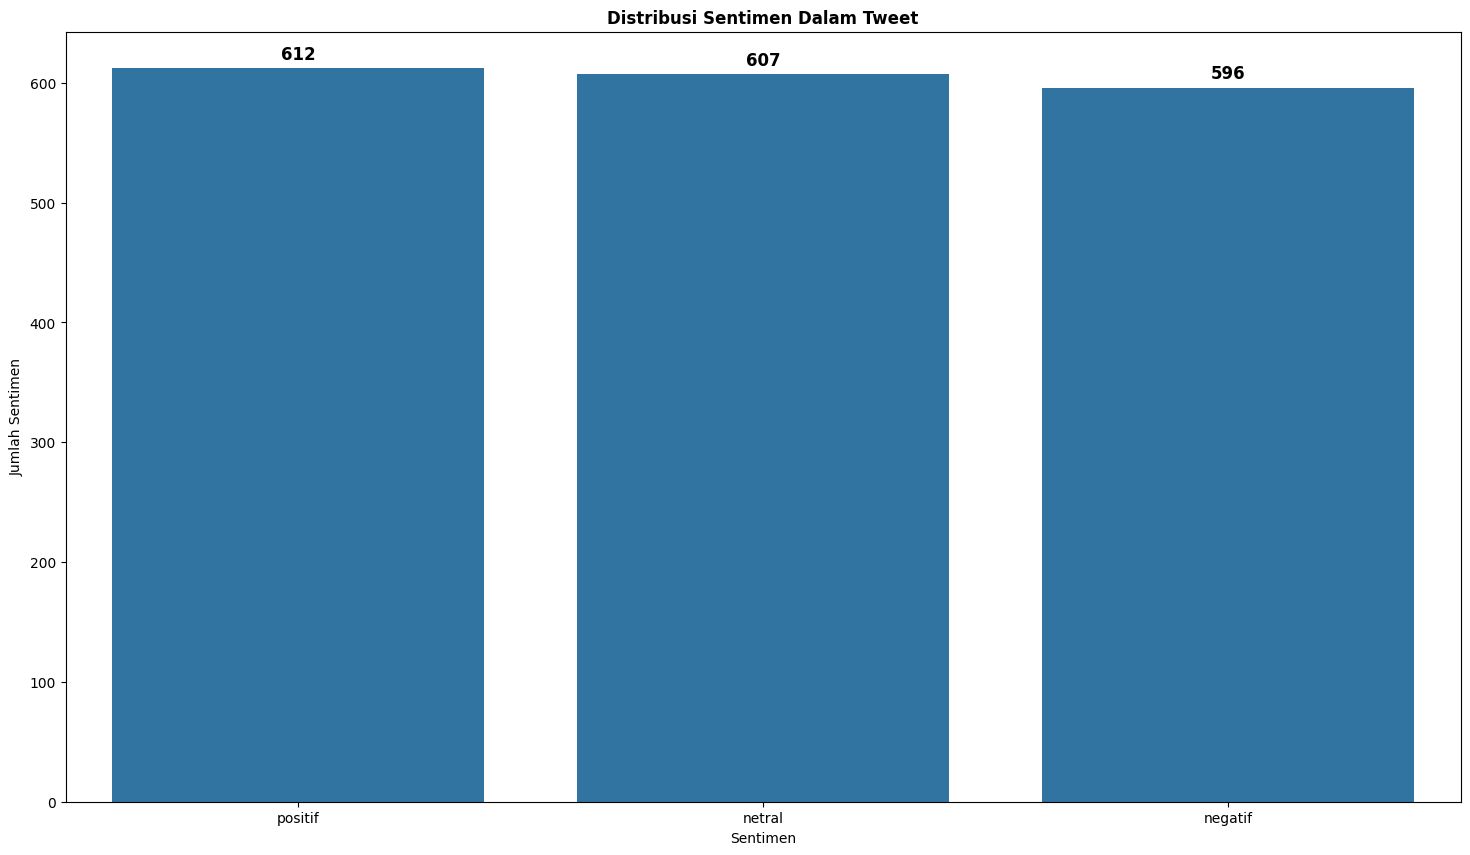

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x=label_count.index, y=label_count.values)
plt.title("Distribusi Sentimen Dalam Tweet", fontweight='bold')
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Sentimen")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold',
                color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

#### **Data Preprocessing**

##### 1. Feature Selection

In [ ]:
#Feature Selection
data.drop(columns="Unnamed: 0", axis=1, inplace=True)
data

sentimen                                              tweet
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4     negatif  Negara kita ngutang buat bngun infrastruktur y...
...       ...                                                ...
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...

[1815 rows x 2 columns]

#### 2. Lowercasing Data

In [ ]:
#Feature Selection
data['tweet'] = data['tweet'].astype(str).str.lower()
show(data['tweet'])

#### 4. Noise Removal

In [ ]:
def cleaned_data(text):
    #Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)

    #Menghapus Karakter khusus atau tanda baca
    text = re.sub(r'[^\w\s]', '', text)

    #Menghapus Angka
    text = re.sub(r'\d+', '', text)

    ##Removal (ðÿ)
    text = re.sub(r'ðÿ+', '', text)

    #Removal (pictwittercom)
    text = re.sub(r'pictwittercom', '', text)

    #Removal (â)
    text = re.sub(r'â', '', text)

    return text

data['tweet'] = data['tweet'].apply(cleaned_data)

In [ ]:
show(data['tweet'])

#### 5. Stopwords

##### Stopword NLTK

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_rem = set(stopwords.words('indonesian'))

In [ ]:
def stopwords_removal_nltk(data):
    text = data.split()
    text = [data1 for data1 in text if data1.lower() not in stopwords_rem]
    return ' '.join(text)

In [ ]:
data_nltk = data.copy()
data_nltk['tweet_stopword'] = data_nltk['tweet'].apply(stopwords_removal_nltk)
show(data_nltk)


##### Stopword Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stopwords_removal_sastrawi(data):
    factory = StopWordRemoverFactory()
    stopwords_remover = factory.create_stop_word_remover()
    df = stopwords_remover.remove(data)

    return df

In [ ]:
data_sastrawi = data.copy()
data_sastrawi['tweet_stopword'] = data_sastrawi['tweet'].apply(stopwords_removal_sastrawi)
show(data_sastrawi)

### **TEXT NORMALIZATION**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

In [ ]:
def lemma_sastrawi(data):
    stemmer = StemmerFactory().create_stemmer()
    tokens = data.split()

    lemma_data = [stemmer.stem(data1) for data1 in tokens]
    lemma_text = ' '.join(lemma_data)
    return lemma_text

In [ ]:
data_nltk['tweet_normalization'] = data_nltk['tweet_stopword'].apply(lemma_sastrawi)
data_sastrawi['tweet_normalization'] = data_sastrawi['tweet_stopword'].apply(lemma_sastrawi)

In [ ]:
show(data_sastrawi)

In [ ]:
show(data_nltk)

In [ ]:
data_nltk.to_csv('data_nltk.csv', index=False)

In [ ]:
data_sastrawi.to_csv('data_sastrawi.csv', index=False)

In [ ]:
#Import Dataset After Stopwords
data_nltk = pd.read_csv("data_nltk.csv")
data_sastrawi = pd.read_csv("data_sastrawi.csv")

#### **TEXT VECTORIZE**

In [ ]:
values_text_nltk = data_nltk['tweet_normalization']
values_text_sastrawi = data_sastrawi['tweet_normalization']
label_text = data_nltk['sentimen']

token_label = {'negatif' : 0, 'netral' : 1, 'positif' : 2}
label_final = [token_label[label] for label in label_text]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorize = TfidfVectorizer()

tfidf_nltk = vectorize.fit_transform(values_text_nltk)
tfidf_sastrawi = vectorize.fit_transform(values_text_sastrawi)

#### 1. Text Vectorize TFIDF

In [ ]:
tfidf_nltk_array = tfidf_nltk.toarray()
tfidf_sastrawi_array = tfidf_sastrawi.toarray()

#### 2. Text Vectorize FastText

In [ ]:
import fasttext

model_fasttext = fasttext.load_model('cc.id.300.bin')

ModuleNotFoundError: No module named 'fasttext'

In [ ]:
fast_text_nltk =
fast_text_sastrawi =

#### 3. Text Vectorize IndoBERT

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch

model_name = 'indolem/indobertweet-base-uncased'
tokenizer_bert = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
def text_vectorize_bert(texts, batch_size=8):
    model.eval()
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        inputs = tokenizer_bert(
            batch,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )

        with torch.no_grad():
            outputs = model(**inputs)

        batch_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
        embeddings.extend(batch_embeddings.numpy())

    return pd.DataFrame(embeddings)

In [ ]:
indo_bert_nltk = text_vectorize_bert(values_text_nltk.tolist())
indo_bert_sastrawi = text_vectorize_bert(values_text_sastrawi.tolist())

#### 4. Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

### **Data Train**

##### 1. TFidf

In [ ]:
x_train_tfidf_nltk, x_test_tfidf_nltk, y_train_tfidf_nltk, y_test_tfidf_nltk = train_test_split(tfidf_nltk_array, label_final, test_size=0.2, random_state=42)
x_train_tfidf_sastrawi, x_test_tfidf_sastrawi, y_train_tfidf_sastrawi, y_test_tfidf_sastrawi = train_test_split(tfidf_sastrawi_array, label_final, test_size=0.2, random_state=42)

print(f"x_train_tfidf_nltk shape : {x_train_tfidf_nltk.shape}")
print(f"x_test_tfidf_nltk shape : {x_test_tfidf_nltk.shape}")
print(f"x_train_tfidf_sastrawi shape : {x_train_tfidf_sastrawi.shape}")
print(f"x_test_tfidf_sastrawi shape : {x_test_tfidf_sastrawi.shape}")

x_train_tfidf_nltk shape : (1452, 5817)
x_test_tfidf_nltk shape : (363, 5817)
x_train_tfidf_sastrawi shape : (1452, 5952)
x_test_tfidf_sastrawi shape : (363, 5952)


##### 2. IndoBert

In [ ]:
x_train_bert_nltk, x_test_bert_nltk, y_train_bert_nltk, y_test_bert_nltk = train_test_split(indo_bert_nltk, label_final, test_size=0.2, random_state=42)
x_train_bert_sastrawi, x_test_bert_sastrawi, y_train_bert_sastrawi, y_test_bert_sastrawi = train_test_split(indo_bert_nltk, label_final, test_size=0.2, random_state=42)

print(f"x_train_bert_nltk shape : {x_train_bert_nltk.shape}")
print(f"x_test_bert_nltk shape : {x_test_bert_nltk.shape}")
print(f"x_train_bert_sastrawi shape : {x_train_bert_sastrawi.shape}")
print(f"x_test_bert_sastrawi shape : {x_test_bert_sastrawi.shape}")

x_train_bert_nltk shape : (1452, 768)
x_test_bert_nltk shape : (363, 768)
x_train_bert_sastrawi shape : (1452, 768)
x_test_bert_sastrawi shape : (363, 768)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = RandomForestClassifier()

#### **Hyperparameter Tuning GridSearch**

In [ ]:
param_random = {
    'n_estimators' : randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_random, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [ ]:
#GridSearch
grid_search.fit(x_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

#Predict Data
y_pred = grid_search.best_estimator_.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best parameters found: {'max_depth': 41, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 283}
Accuracy: 0.6088154269972452


#### **Hyperparameter Tuning RandomSearch**

In [ ]:
param_random = {
    'n_estimators' : randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_random, n_iter=100, cv=5, random_state=42, n_jobs=-1)

##### 1. IndoBert

In [ ]:
# RandomSearch with indobert NLTK
rand_search.fit(x_train_bert_nltk, y_train_bert_nltk)
print(f"Best parameters found: {rand_search.best_params_}")

#Predict Data
y_pred_bert_nltk = rand_search.best_estimator_.predict(x_test_bert_nltk)
print(f"Accuracy: {accuracy_score(y_test_bert_nltk, y_pred_bert_nltk)}")

c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

Best parameters found: {'max_depth': 44, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 589}
Accuracy: 0.5867768595041323


In [ ]:
# RandomSearch with indobert Sastrawi
rand_search.fit(x_train_bert_sastrawi, y_train_bert_sastrawi)
print(f"Best parameters found: {rand_search.best_params_}")

#Predict Data
y_pred_bert_sastrawi = rand_search.best_estimator_.predict(x_test_bert_sastrawi)
print(f"Accuracy: {accuracy_score(y_test_bert_sastrawi, y_pred_bert_sastrawi)}")

c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrain

Best parameters found: {'max_depth': 54, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 655}
Accuracy: 0.5757575757575758


In [ ]:
model_bert_nltk = RandomForestClassifier(max_depth=44, max_features='log2', min_samples_leaf=1, min_samples_split=6, n_estimators=589).fit(x_train_bert_nltk, y_train_bert_nltk)


In [ ]:
y_pred_bert_nltk = model_bert_nltk.predict(x_test_bert_nltk)

In [ ]:
from sklearn.metrics import classification_report

report_random_forest = classification_report(y_test_bert_nltk, y_pred_bert_nltk)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       115
           1       0.51      0.61      0.55       118
           2       0.59      0.50      0.54       130

    accuracy                           0.56       363
   macro avg       0.56      0.56      0.56       363
weighted avg       0.56      0.56      0.56       363



##### 2. TFidf

In [ ]:
# RandomSearch with indobert Sastrawi
rand_search.fit(x_train_tfidf_sastrawi, y_train_tfidf_sastrawi)
print(f"Best parameters found: {rand_search.best_params_}")

#Predict Data
y_pred_tfidf_sastrawi = rand_search.best_estimator_.predict(x_test_tfidf_sastrawi)
print(f"Accuracy: {accuracy_score(y_test_tfidf_sastrawi, y_pred_tfidf_sastrawi)}")

c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

Best parameters found: {'max_depth': 44, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 589}
Accuracy: 0.6253443526170799


In [ ]:
# RandomSearch with indobert NLTK
rand_search.fit(x_train_tfidf_nltk, y_train_tfidf_nltk)
print(f"Best parameters found: {rand_search.best_params_}")

#Predict Data
y_pred_tfidf_nltk = rand_search.best_estimator_.predict(x_test_tfidf_nltk)
print(f"Accuracy: {accuracy_score(y_test_tfidf_nltk, y_pred_tfidf_nltk)}")

c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ammar\anaconda3\envs\nlp_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

Best parameters found: {'max_depth': 44, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 589}
Accuracy: 0.6143250688705234


In [ ]:
model_tfidf_sastrawi = RandomForestClassifier(max_depth=44, max_features='log2', min_samples_leaf=1, min_samples_split=6, n_estimators=589).fit(x_train_tfidf_sastrawi, y_train_tfidf_sastrawi)

In [ ]:
y_pred_tfidf_sastrawi = model_tfidf_sastrawi.predict(x_test_tfidf_sastrawi)

In [ ]:
from sklearn.metrics import classification_report

report_random_forest = classification_report(y_test_tfidf_sastrawi, y_pred_tfidf_sastrawi)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.60      0.68      0.63       115
           1       0.60      0.66      0.63       118
           2       0.64      0.50      0.56       130

    accuracy                           0.61       363
   macro avg       0.61      0.61      0.61       363
weighted avg       0.61      0.61      0.61       363



#### **Model Evaluation**

##### 1. Classification Reports

In [ ]:
from sklearn.metrics import classification_report

report_random_forest = classification_report(y_true, y_pred)
report_random_forest

## **MODEL LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

max_length = 100

model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=max_length))
model.add(LSTM(units=128, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train_bert_sastrawi = x_train_bert_sastrawi.values
x_test_bert_sastrawi = x_test_bert_sastrawi.values

from tensorflow.keras.utils import to_categorical
y_train_bert_sastrawi = to_categorical(y_train_bert_sastrawi)
y_test_bert_sastrawi = to_categorical(y_test_bert_sastrawi)

In [ ]:
history = model.fit(x_train_bert_sastrawi, y_train_bert_sastrawi, epochs=20, batch_size=64, validation_data=(x_test_bert_sastrawi, y_test_bert_sastrawi))

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.3189 - loss: 1.1007 - val_accuracy: 0.3471 - val_loss: 1.1034
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.3615 - loss: 1.0962 - val_accuracy: 0.3609 - val_loss: 1.0952
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3849 - loss: 1.0903 - val_accuracy: 0.3499 - val_loss: 1.0962
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3844 - loss: 1.0925 - val_accuracy: 0.3499 - val_loss: 1.0956
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.3810 - loss: 1.0869 - val_accuracy: 0.3554 - val_loss: 1.0951
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.3708 - loss: 1.0841 - val_accuracy: 0.3664 - val_loss: 1.1013
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3819 - loss: 1.0922 - val_accuracy: 0.3609 - val_loss: 1.1002
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4024 - loss: 1.0777 - val_accuracy: 0.3636 - val_loss:

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(x_test_bert_sastrawi, y_test_bert_sastrawi)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 598ms/step - accuracy: 0.3009 - loss: 1.1272
Test Accuracy: 32.51%


In [ ]:
# Menggunakan model untuk prediksi pada data uji
y_pred = model.predict(x_test_bert_sastrawi)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 720ms/step
